In [14]:
import cdsapi
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
c = cdsapi.Client()

In [5]:
request ={'product_type':'reanalysis',
        'format':'netcdf',
        'variable':[
            'divergence','fraction_of_cloud_cover','geopotential',
            'ozone_mass_mixing_ratio','potential_vorticity','relative_humidity',
            'specific_cloud_ice_water_content','specific_cloud_liquid_water_content','specific_humidity',
            'specific_rain_water_content','specific_snow_water_content','temperature',
            'u_component_of_wind','v_component_of_wind','vertical_velocity',
            'vorticity'
        ],
        'pressure_level':[
            '1','2','3',
            '5','7','10',
            '20','30','50',
            '70','100','125',
            '150','175','200',
            '225','250','300',
            '350','400','450',
            '500','550','600',
            '650','700','750',
            '775','800','825',
            '850','875','900',
            '925','950','975',
            '1000'
        ],
        'year':'2019',
        'month':'04',
        'day':'30',
        'area': "35.00/-94.00/20.00/-75.00",
        'time':[
            '00:00','01:00','02:00',
            '03:00','04:00','05:00',
            '06:00','07:00','08:00',
            '09:00','10:00','11:00',
            '12:00','13:00','14:00',
            '15:00','16:00','17:00',
            '18:00','19:00','20:00',
            '21:00','22:00','23:00'
        ]
    }

In [6]:
c.retrieve("reanalysis-era5-pressure-levels", request, "/data/era5/output.nc")

2019-07-25 13:53:25,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2019-07-25 13:53:26,305 INFO Request is queued
2019-07-25 13:53:27,415 INFO Request is running
2019-07-25 14:01:46,780 INFO Request is completed
2019-07-25 14:01:46,781 INFO Downloading http://136.156.132.236/cache-compute-0007/cache/data0/adaptor.mars.internal-1564080806.4274726-29958-13-69fc0f0e-1f1d-47dc-bb5e-e855311e28a7.nc to /data/era5/output.nc (127.3M)
2019-07-25 14:02:43,783 INFO Download rate 2.2M/s  


Result(content_length=133476164,content_type=application/x-netcdf,location=http://136.156.132.236/cache-compute-0007/cache/data0/adaptor.mars.internal-1564080806.4274726-29958-13-69fc0f0e-1f1d-47dc-bb5e-e855311e28a7.nc)

Spatial extent: the keyword area allows to download a very specific subset. The definition is N/W/S/E in degrees longitude and latitude (see API manual). Negative values correspond to S and W. In the example above a domain over Europe.

In [9]:
ds = xr.open_dataset('/data/era5/output.nc')

In [10]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 61, level: 37, longitude: 77, time: 24)
Coordinates:
  * longitude  (longitude) float32 -94.0 -93.75 -93.5 ... -75.5 -75.25 -75.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 20.5 20.25 20.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2019-04-30 ... 2019-04-30T23:00:00
Data variables:
    d          (time, level, latitude, longitude) float32 ...
    cc         (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    o3         (time, level, latitude, longitude) float32 ...
    pv         (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    ciwc       (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    crwc       (time, le

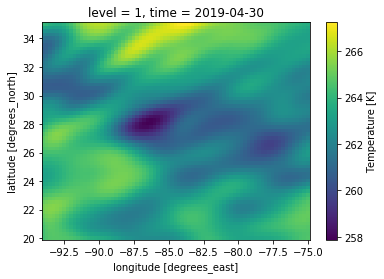

In [11]:
ds.t[0,0,:,:].plot()

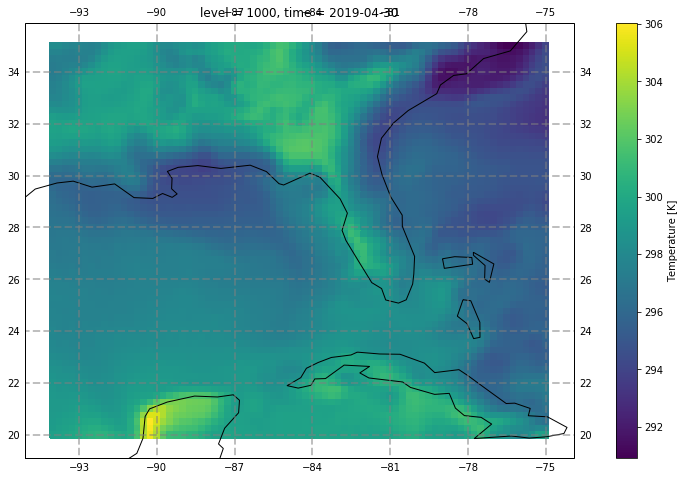

In [27]:
fme = plt.figure(figsize=[15,8])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
ds.t.sel(time=0, level=1000, method='nearest').plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')


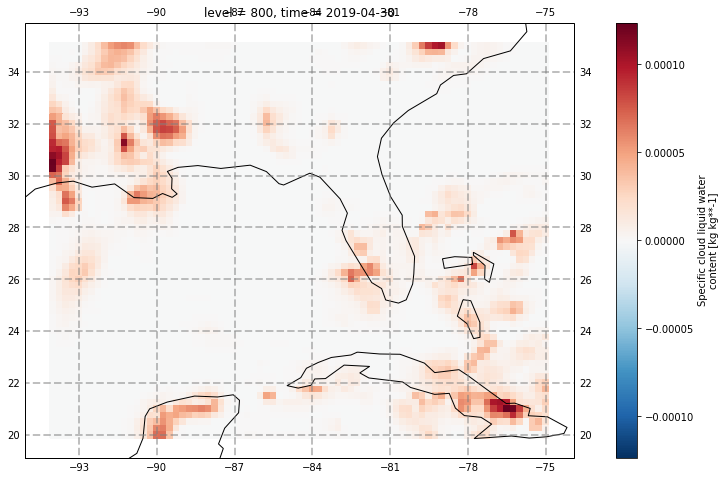

In [28]:
fme = plt.figure(figsize=[15,8])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
ds.clwc.sel(time=0, level=800, method='nearest').plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')


In [ ]:
ccrs.pl